# House Prices Predictions

## Plan of action
1. Explore Dataset
    1. check length of rows/columns for each dataset
    2. check data types
    3. check for null values
    4. change column names if necessary
2. Plan project road map
    1. determine if I should use Supervised or Unsupervised ML or both?
    2. determine which type of ML models to use
    3. determine x_training data, x_test data, y_train_data y_test data
3. Clean data
    1. remove any null values
    2. remove any unneccessary columns
    3. In necessary features, bin rare values into "other" bin
    4. remove any duplicate ID's
    5. change any data types if necessary
4. Preprocess data
    1. convert categorical data to numerical using OHE
    2. scale data using standarscaler
    4. Create RandomForest model 



In [10]:
#import dependencies
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestRegressor

import warnings
warnings.filterwarnings('ignore')


In [11]:
#load data
test_file = "/Users/Jerry/Documents/house-price-predictor/resources/test.csv"
train_file = "/Users/Jerry/Documents/house-price-predictor/resources/train.csv"
sales_file = "/Users/Jerry/Documents/house-price-predictor/resources/sample_submission.csv"

test_df = pd.read_csv(test_file)
train_df = pd.read_csv(train_file)
sales_df = pd.read_csv(sales_file)

In [12]:
#check the shape of each dataframe
print(test_df.shape)
print(train_df.shape)
print(sales_df.shape)

(1459, 80)
(1460, 81)
(1459, 2)


## Clean Data

### Merging Dataframes into One Complete Dateframe

In [13]:
#merge sales_df with the test_df. Having all the data in one dataframe will make it easier to preprocess.
df = test_df.merge(sales_df, how= "inner", on= "Id")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,169277.052498
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,187758.393989
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,183583.683570
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,179317.477511
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,150730.079977


In [14]:
#create a main df with the consolidated test dataframe and the train dataframe
main_df = pd.concat([train_df, df])

main_df = main_df.set_index('Id')
print(main_df.shape)
main_df.head()

(2919, 80)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


### Dealing with Null Values

In [15]:
#check the number of null values in each column
for column in main_df.columns:
    print(f"Column {column} has {main_df[column].isnull().sum()} null values")

Column MSSubClass has 0 null values
Column MSZoning has 4 null values
Column LotFrontage has 486 null values
Column LotArea has 0 null values
Column Street has 0 null values
Column Alley has 2721 null values
Column LotShape has 0 null values
Column LandContour has 0 null values
Column Utilities has 2 null values
Column LotConfig has 0 null values
Column LandSlope has 0 null values
Column Neighborhood has 0 null values
Column Condition1 has 0 null values
Column Condition2 has 0 null values
Column BldgType has 0 null values
Column HouseStyle has 0 null values
Column OverallQual has 0 null values
Column OverallCond has 0 null values
Column YearBuilt has 0 null values
Column YearRemodAdd has 0 null values
Column RoofStyle has 0 null values
Column RoofMatl has 0 null values
Column Exterior1st has 1 null values
Column Exterior2nd has 1 null values
Column MasVnrType has 24 null values
Column MasVnrArea has 23 null values
Column ExterQual has 0 null values
Column ExterCond has 0 null values
Co

Many columns have null values. Each column will be handled uniquely based on number of null values within column and column description

In [16]:
#Column LotFrontage has 486 null values / Description: Linear feet of street connected to property
main_df["LotFrontage"] = main_df["LotFrontage"].replace(to_replace= np.nan, value=0)

#Column Alley has 2721 null values / Type of alley access to property
#column "Alley" has many NaN data points, based off "data_description" file, NaN means no alley.
main_df["Alley"] = main_df["Alley"].replace(to_replace= np.nan, value="None")

In [17]:
#Column MasVnrType has 24 null values / Masonry veneer type
#Column MasVnrArea has 23 null values / Masonry veneer area in square feet

#For the one row with a MasVnr area and a null MasVnr Type, I will set the type to the most popular categorical value "BrkFace"
main_df.at[2611, 'MasVnrType'] = "BrkFace"

#convert nan to "none"
main_df["MasVnrType"] = main_df["MasVnrType"].replace(to_replace= np.nan, value="None")


#Converted nan to zero, because these rows have no masonry veneer. 
main_df["MasVnrArea"] = main_df["MasVnrArea"].replace(to_replace= np.nan, value=0)


In [18]:
#basement columns

#Column BsmtQual has 81 null values / Evaluates the height of the basement
#Column BsmtCond has 82 null values / Evaluates the general condition of the basement

#columns have established NA data point for houses with no basements, so converting all nan values to NA
main_df["BsmtQual"] = main_df["BsmtQual"].replace(to_replace= np.nan, value="NA")
main_df["BsmtCond"] = main_df["BsmtCond"].replace(to_replace= np.nan, value="NA")

#column BsmtExposure has 82 null values / Refers to walkout or garden level walls
#Column BsmtFinType1 has 79 null values / Rating of basement finished area

main_df["BsmtExposure"] = main_df["BsmtExposure"].replace(to_replace= np.nan, value="NA")
main_df["BsmtFinType1"] = main_df["BsmtFinType1"].replace(to_replace= np.nan, value="NA")

#Column BsmtFinType2 has 80 null values / Rating of basement finished area (if multiple types)
main_df["BsmtFinType2"] = main_df["BsmtFinType2"].replace(to_replace= np.nan, value="NA")

In [19]:
#Garages

#Column FireplaceQu has 1420 null values / Fireplace quality

#Column GarageType has 157 null values / Garage location
#Column GarageFinish has 159 null values /  Interior finish of the garage

#Column GarageQual has 159 null values /
#Column GarageCond has 159 null values /

#converting np.nan with "NA" because these houses don't have a fire place
main_df["FireplaceQu"] = main_df["FireplaceQu"].replace(to_replace= np.nan, value="NA")

#converting np.nan with "NA" because these house don't have a garage
main_df["GarageType"] = main_df["GarageType"].replace(to_replace= np.nan, value="NA")
main_df["GarageFinish"] = main_df["GarageFinish"].replace(to_replace= np.nan, value="NA")

main_df["GarageQual"] = main_df["GarageQual"].replace(to_replace= np.nan, value="NA")
main_df["GarageCond"] = main_df["GarageCond"].replace(to_replace= np.nan, value="NA")

#Column GarageYrBlt has 159 null values / Year garage was built
#Replaced null values with the mean Year within the dataset, which is 1978
main_df["GarageYrBlt"] = main_df["GarageYrBlt"].replace(to_replace= np.nan, value=round(main_df["GarageYrBlt"].mean()))


In [20]:
#Column PoolQC has 2909 null values /  Pool quality
#Column Fence has 2348 null values /  Fence quality
#Column MiscFeature has 2814 null values / Miscellaneous feature not covered in other categories / Elevator, 2nd Garage, Tennis Court

#converting np.nan with "NA" because house doesn't have a pool or fence
main_df["PoolQC"] = main_df["PoolQC"].replace(to_replace= np.nan, value="NA")
main_df["Fence"] = main_df["Fence"].replace(to_replace= np.nan, value="NA")

main_df["MiscFeature"] = main_df["MiscFeature"].replace(to_replace= np.nan, value="NA")

In [21]:
#Recheck if any columns have more than 5 null values
for column in main_df.columns:
    print(f"Column {column} has {main_df[column].isnull().sum()} null values")

Column MSSubClass has 0 null values
Column MSZoning has 4 null values
Column LotFrontage has 0 null values
Column LotArea has 0 null values
Column Street has 0 null values
Column Alley has 0 null values
Column LotShape has 0 null values
Column LandContour has 0 null values
Column Utilities has 2 null values
Column LotConfig has 0 null values
Column LandSlope has 0 null values
Column Neighborhood has 0 null values
Column Condition1 has 0 null values
Column Condition2 has 0 null values
Column BldgType has 0 null values
Column HouseStyle has 0 null values
Column OverallQual has 0 null values
Column OverallCond has 0 null values
Column YearBuilt has 0 null values
Column YearRemodAdd has 0 null values
Column RoofStyle has 0 null values
Column RoofMatl has 0 null values
Column Exterior1st has 1 null values
Column Exterior2nd has 1 null values
Column MasVnrType has 0 null values
Column MasVnrArea has 0 null values
Column ExterQual has 0 null values
Column ExterCond has 0 null values
Column Fo

In [22]:
#16 columns remaining with null values
#Each column has less than 5 null values

#Remove all remaining rows with a null value, about 28 rows
full_df = main_df.dropna()
print(full_df.shape)
full_df.head()

(2906, 80)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,...,0,NA,NA,NA,0,2,2008,WD,Normal,208500.0
2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,...,0,NA,NA,NA,0,5,2007,WD,Normal,181500.0
3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,...,0,NA,NA,NA,0,9,2008,WD,Normal,223500.0
4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,...,0,NA,NA,NA,0,2,2006,WD,Abnorml,140000.0
5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,...,0,NA,NA,NA,0,12,2008,WD,Normal,250000.0


### Converting categorical data to numerical data

In [23]:
#check the number of unique values in each column
#check the data type of each column
#What is the total number of categorical columns?

column_list = (full_df.columns).to_list()
count = 0
for i in column_list: 
     if full_df[i].dtype == "object":
        print(f"name: {full_df[i].name}, dtype: {full_df[i].dtype}, unique_values: {len(full_df[i].unique())}")
        count += 1

print(f"Number Of Categorical Columns: {count}/61")

name: MSZoning, dtype: object, unique_values: 5
name: Street, dtype: object, unique_values: 2
name: Alley, dtype: object, unique_values: 3
name: LotShape, dtype: object, unique_values: 4
name: LandContour, dtype: object, unique_values: 4
name: Utilities, dtype: object, unique_values: 2
name: LotConfig, dtype: object, unique_values: 5
name: LandSlope, dtype: object, unique_values: 3
name: Neighborhood, dtype: object, unique_values: 25
name: Condition1, dtype: object, unique_values: 9
name: Condition2, dtype: object, unique_values: 8
name: BldgType, dtype: object, unique_values: 5
name: HouseStyle, dtype: object, unique_values: 8
name: RoofStyle, dtype: object, unique_values: 6
name: RoofMatl, dtype: object, unique_values: 8
name: Exterior1st, dtype: object, unique_values: 15
name: Exterior2nd, dtype: object, unique_values: 16
name: MasVnrType, dtype: object, unique_values: 4
name: ExterQual, dtype: object, unique_values: 4
name: ExterCond, dtype: object, unique_values: 5
name: Foundatio

In [24]:
#For columns that have more than 10 unique values, determine the number of data points for each unique value.   
#convert rare categorical values into bin variable "other"
#columns found: Neighborhood / Exterior1st / Exterior2nd

neighbor_bin = ['IDOTRR', 'NoRidge', 'Timber', 'StoneBr', 'SWISU', 'ClearCr', 'MeadowV', 'BrDale', 'Blmngtn', 'Veenker', 
    'NPkVill', 'Blueste', 'Sawyer', 'Sawyer', 'NWAmes', 'SawyerW', 'Mitchel', 'BrkSide', 'Crawfor']

for street in neighbor_bin:
    full_df["Neighborhood"] = full_df["Neighborhood"].replace(street, "Other")

full_df["Neighborhood"].value_counts()

Other      1253
NAmes       443
CollgCr     267
OldTown     239
Edwards     192
Somerst     182
NridgHt     166
Gilbert     164
Name: Neighborhood, dtype: int64

In [25]:
#Converted rare categorical values into bin variable named "other"

bin = ['AsbShng', 'Stucco', 'BrkComm', 'AsphShn', 'Stone', 'ImStucc', 'CBlock', 'CemntBd', 'BrkFace', 'WdShing']

for item in bin:
    full_df["Exterior1st"] = full_df["Exterior1st"].replace(item, "Other")

full_df["Exterior1st"].value_counts()

VinylSd    1024
MetalSd     449
HdBoard     442
Wd Sdng     406
Other       366
Plywood     219
Name: Exterior1st, dtype: int64

In [26]:
#Converted rare categorical values into bin variable named "other"

bin = ["Stucco", "BrkFace", "AsbShng", "Brk Cmn", "ImStucc", "Stone", "AsphShn", "CBlock", 'CmentBd', 'Wd Shng']

for name in bin:
    full_df["Exterior2nd"] = full_df["Exterior2nd"].replace(name, "Other")

full_df["Exterior2nd"].value_counts()

VinylSd    1011
MetalSd     447
HdBoard     406
Other       388
Wd Sdng     387
Plywood     267
Name: Exterior2nd, dtype: int64

In [27]:
#Converted rare categorical values into bin variable named "other"

bin = ["RH", "C (all)"]

for name in bin:
    full_df["MSZoning"] = full_df["MSZoning"].replace(name, "Other")

full_df["MSZoning"].value_counts()

RL       2259
RM        457
FV        139
Other      51
Name: MSZoning, dtype: int64

In [28]:
#Converted rare categorical values into bin variable named "other"

bin = ["FR2", "FR3"]

for name in bin:
    full_df["LotConfig"] = full_df["LotConfig"].replace(name, "Other")

full_df['LotConfig'].value_counts()

Inside     2124
Corner      509
CulDSac     176
Other        97
Name: LotConfig, dtype: int64

In [29]:
#Converted rare categorical values into bin variable named "other"

bin = ['RRAn', 'PosN', 'RRAe', 'PosA', 'RRNn', 'RRNe']

for name in bin:
    full_df["Condition1"] = full_df["Condition1"].replace(name, "Other")

full_df['Condition1'].value_counts()

Norm      2503
Feedr      161
Other      152
Artery      90
Name: Condition1, dtype: int64

In [30]:
#Converted rare categorical values into bin variable named "other"

bin = ['RRAe', 'RRAn', 'RRNn', 'PosA', 'PosN', 'Artery', 'Feedr']

for name in bin:
    full_df["Condition2"] = full_df["Condition2"].replace(name, "Other")

full_df['Condition2'].value_counts()

Norm     2876
Other      30
Name: Condition2, dtype: int64

In [31]:
#Converted rare categorical values into bin variable named "other"

bin = ['SFoyer', '2.5Unf', '1.5Unf', '2.5Fin']

for name in bin:
    full_df["HouseStyle"] = full_df["HouseStyle"].replace(name, "Other")

full_df['HouseStyle'].value_counts()

1Story    1463
2Story     871
1.5Fin     312
Other      133
SLvl       127
Name: HouseStyle, dtype: int64

In [32]:
#Converted rare categorical values into bin variable named "other"

bin = ['SFoyer', '2.5Unf', '1.5Unf', '2.5Fin']

for name in bin:
    full_df["HouseStyle"] = full_df["HouseStyle"].replace(name, "Other")

full_df['HouseStyle'].value_counts()

1Story    1463
2Story     871
1.5Fin     312
Other      133
SLvl       127
Name: HouseStyle, dtype: int64

In [33]:
#Converted rare categorical values into bin variable named "other"

bin = ['Gambrel', 'Flat', 'Mansard', 'Shed']

for name in bin:
    full_df["RoofStyle"] = full_df["RoofStyle"].replace(name, "Other")

full_df['RoofStyle'].value_counts()

Gable    2300
Hip       549
Other      57
Name: RoofStyle, dtype: int64

In [34]:
#Converted rare categorical values into bin variable named "other"

bin = ['WdShake', 'WdShngl', 'Metal', 'Membran', 'Roll', 'ClyTile']

for name in bin:
    full_df["RoofMatl"] = full_df["RoofMatl"].replace(name, "Other")

full_df['RoofMatl'].value_counts()

CompShg    2864
Tar&Grv      22
Other        20
Name: RoofMatl, dtype: int64

In [35]:
#Converted rare categorical values into bin variable named "other"

bin = ['BLQ', 'ALQ', 'GLQ']

for name in bin:
    full_df["BsmtFinType2"] = full_df["BsmtFinType2"].replace(name, "Other")

full_df['BsmtFinType2'].value_counts()

Unf      2486
Other     153
Rec       105
LwQ        87
NA         75
Name: BsmtFinType2, dtype: int64

In [36]:
#Converted rare categorical values into bin variable named "other"

bin = ['Sev', 'Maj2', 'Maj1']

for name in bin:
    full_df["Functional"] = full_df["Functional"].replace(name, "Other")

full_df['Functional'].value_counts()

Typ      2711
Min2       69
Min1       64
Mod        33
Other      29
Name: Functional, dtype: int64

In [37]:
#create X and Y variables for train and test split
y = full_df["SalePrice"].values
x = full_df.drop("SalePrice", axis=1)

x.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,...,0,0,NA,NA,NA,0,2,2008,WD,Normal
2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,Other,...,0,0,NA,NA,NA,0,5,2007,WD,Normal
3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,...,0,0,NA,NA,NA,0,9,2008,WD,Normal
4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,...,0,0,NA,NA,NA,0,2,2006,WD,Abnorml
5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,Other,...,0,0,NA,NA,NA,0,12,2008,WD,Normal


In [38]:
#use get_dummies to convert categorical variables into indicator variables
X = pd.get_dummies(x)
X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,0,0,0,1,0,0,0,0,1,0
2,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,0,0,0,1,0,0,0,0,1,0
3,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,0,0,0,1,0,0,0,0,1,0
4,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,0,0,0,1,1,0,0,0,0,0
5,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,0,0,0,1,0,0,0,0,1,0


In [39]:
#create train and test spilts for model
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

#create and train scaler instance
scaler = StandardScaler().fit(X_train)

#transform X dataset with scaler
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## ML Model Implementation

In [40]:
#Create and train a Decision Tree Classifer model
rfr_first = RandomForestRegressor(n_estimators=100, random_state=0).fit(X_train_scaled, y_train)

#Check performance
print(f'Training Score: {rfr_first.score(X_train_scaled, y_train)}')
print(f'Test Score: {rfr_first.score(X_test_scaled, y_test)}')

Training Score: 0.9209174293161273
Test Score: 0.5146897816304703


In [41]:
feature_importances = rfr_first.feature_importances_

In [ ]:
features = sorted(zip(X.columns, rfr_first.feature_importances_), key = lambda x: x[1])
cols = [f[0] for f in features]
width = [f[1] for f in features]

fig, ax = plt.subplots()

fig.set_size_inches(10,200)
plt.margins(y=0.001)

ax.barh(y=cols, width=width)

plt.show()

In [37]:
from sklearn.feature_selection import SelectFromModel
sel = SelectFromModel(rfr_first)
sel.fit(X_train_scaled, y_train)

SelectFromModel(estimator=RandomForestRegressor(random_state=0))

In [38]:
sel_X = sel.transform(X)

x_selected_train, x_selected_test, y_train, y_test = train_test_split(sel_X, y, random_state=1)
scaler = StandardScaler().fit(x_selected_train, y_train)
x_selected_train_scaled = scaler.transform(x_selected_train)
x_selected_test_scaled = scaler.transform(x_selected_test)

/Users/Jerry/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [39]:
rfr_final = RandomForestRegressor(n_estimators=200, random_state=0).fit(x_selected_train_scaled, y_train)
print(f'Training Score: {rfr_final.score(x_selected_train_scaled, y_train)}')
print(f'Testing Score: {rfr_final.score(x_selected_test_scaled, y_test)}')

Training Score: 0.9274026055977839
Testing Score: 0.4719268305308967


In [40]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_selected_train_scaled, y_train)
print(f'Training Score: {lr.score(x_selected_train_scaled, y_train)}')
print(f'Testing Score: {lr.score(x_selected_test_scaled, y_test)}')

Training Score: 0.4618020632842791
Testing Score: 0.5042743773402139


Training Score: 0.46180204448226747
Testing Score: 0.5042945421103557
Model: LASSO


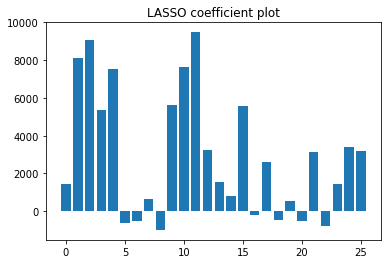

In [41]:
from sklearn.linear_model import Lasso
reg = Lasso(max_iter=2000).fit(x_selected_train_scaled, y_train)  
print(f'Training Score: {reg.score(x_selected_train_scaled, y_train)}')
print(f'Testing Score: {reg.score(x_selected_test_scaled, y_test)}')
print('Model: LASSO')
plt.bar(np.arange(len(reg.coef_)), reg.coef_)
plt.title(f'LASSO coefficient plot')
plt.show()  

In [44]:
from sklearn.linear_model import Ridge
ridge_model = Ridge(max_iter=2000).fit(x_selected_train_scaled, y_train)
print(f'Training Score: {ridge_model.score(x_selected_train_scaled, y_train)}')
print(f'Test Score: {ridge_model.score(x_selected_test_scaled, y_test)}')

Training Score: 0.46180136764128976
Test Score: 0.5043150497789244


In [45]:
from sklearn.linear_model import ElasticNet
elastic_model = ElasticNet(max_iter=2000).fit(x_selected_train_scaled, y_train)
print(f'Training Score: {elastic_model.score(x_selected_train_scaled, y_train)}')
print(f'Test Score: {elastic_model.score(x_selected_test_scaled, y_test)}')

Training Score: 0.45114483374642567
Test Score: 0.5003488712721308


## Next steps
### Optimize Random Forest Regressor

Checking for target variable normality.

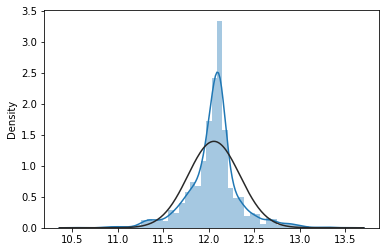

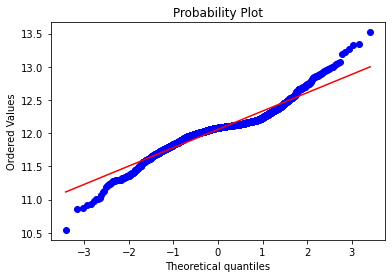

In [78]:
from scipy.stats import norm
import seaborn as sns
from scipy import stats

sns.distplot(y_train, fit=norm)
fig = plt.figure()
res = stats.probplot(y_train, plot = plt)

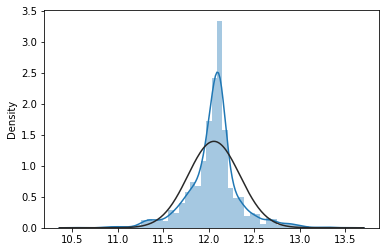

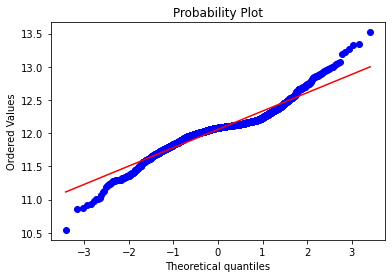

In [76]:
#enforcing normality through a transformation, in hopes of developing an accurate regression model
import numpy as np
y_train = np.log(y_train)
sns.distplot(y_train, fit=norm)
fig = plt.figure()
res = stats.probplot(y_train, plot=plt)

In [64]:
features[-10:]

[('1stFlrSF', 0.026752547889879665),
 ('BsmtUnfSF', 0.028316097774449985),
 ('TotRmsAbvGrd', 0.029196209066689228),
 ('2ndFlrSF', 0.03097430775872031),
 ('BsmtFinSF1', 0.03714251075254735),
 ('GarageArea', 0.03949747407849239),
 ('TotalBsmtSF', 0.04638295691019893),
 ('LotArea', 0.046664916562260766),
 ('GrLivArea', 0.17430866950393195),
 ('OverallQual', 0.1920836798847199)]

In [72]:
#top 10 features based off feature_importance_ from initial forest regression
included_features = ["OverallQual","GrLivArea","LotArea","TotalBsmtSF","GarageArea","BsmtFinSF1","2ndFlrSF","TotRmsAbvGrd", 
                    "BsmtUnfSF", "1stFlrSF"] 

#define x and y training data with only top 10 features
x_ten = X_train[included_features]

#define x test data with only top 10 features
x_test_ten = X_test[included_features]

In [73]:
#create and train scaler instance
ss = StandardScaler().fit(x_ten)

x_ten_scaled = ss.transform(x_ten)
x_test_ten_scaled = ss.transform(x_test_ten)

In [79]:
#number of estimators to consider
from sklearn.model_selection import cross_val_score


estimators = [50, 60, 70, 80, 90, 100]
#array to hold mean of random forest regressions
mean_rfrs = []

yt = [i for i in y_train]

for i in estimators:
    model = RandomForestRegressor(n_estimators=i, max_depth=None)
    scores_rfr = cross_val_score(model, x_ten_scaled, yt, cv=10, scoring="explained_variance")
    print(f'estimators {i}')
    print(f'Est. Explained Variance {scores_rfr.mean()}')
    print("")

    mean_rfrs.append(scores_rfr.mean())

estimators 50
Est. Explained Variance 0.42926184234471804

estimators 60
Est. Explained Variance 0.430923318272617

estimators 70
Est. Explained Variance 0.4364166483029307

estimators 80
Est. Explained Variance 0.4324618864470799

estimators 90
Est. Explained Variance 0.4357866374471394

estimators 100
Est. Explained Variance 0.4312766810198677



In [ ]:
#Next Test
#Top 20 Features

In [80]:
features[-20:]

[('YrSold', 0.00894710385607614),
 ('GarageCars', 0.012066048444335526),
 ('YearBuilt', 0.015120841816202062),
 ('OpenPorchSF', 0.016630673529620225),
 ('MoSold', 0.017076072371243884),
 ('YearRemodAdd', 0.018443242804518263),
 ('LotFrontage', 0.018721172907158582),
 ('MasVnrArea', 0.01897505917821738),
 ('WoodDeckSF', 0.02080666847456982),
 ('GarageYrBlt', 0.02135574181005817),
 ('1stFlrSF', 0.026752547889879665),
 ('BsmtUnfSF', 0.028316097774449985),
 ('TotRmsAbvGrd', 0.029196209066689228),
 ('2ndFlrSF', 0.03097430775872031),
 ('BsmtFinSF1', 0.03714251075254735),
 ('GarageArea', 0.03949747407849239),
 ('TotalBsmtSF', 0.04638295691019893),
 ('LotArea', 0.046664916562260766),
 ('GrLivArea', 0.17430866950393195),
 ('OverallQual', 0.1920836798847199)]

In [81]:
#top 10 features based off feature_importance_ from initial forest regression
included_features = ["OverallQual","GrLivArea","LotArea","TotalBsmtSF","GarageArea","BsmtFinSF1","2ndFlrSF","TotRmsAbvGrd", 
                    "BsmtUnfSF", "1stFlrSF", "GarageYrBlt", "WoodDeckSF", "MasVnrArea", "LotFrontage", "YearRemodAdd", 
                    "MoSold", "OpenPorchSF", "YearBuilt", "GarageCars", "YrSold"]

#define x and y training data with only top 10 features
x_twenty = X_train[included_features]

#define x test data with only top 10 features
x_test_twenty = X_test[included_features]

In [82]:
#create and train scaler instance
ss2 = StandardScaler().fit(x_twenty)

x_twenty_scaled = ss2.transform(x_twenty)
x_test_twenty_scaled = ss2.transform(x_test_twenty)

In [83]:
#number of estimators to consider
from sklearn.model_selection import cross_val_score


estimators = [50, 60, 70, 80, 90, 100]
#array to hold mean of random forest regressions
mean_rfrs_2 = []

yt = [i for i in y_train]

for i in estimators:
    model = RandomForestRegressor(n_estimators=i, max_depth=None)
    scores_rfr = cross_val_score(model, x_twenty_scaled, yt, cv=10, scoring="explained_variance")
    print(f'estimators {i}')
    print(f'Est. Explained Variance {scores_rfr.mean()}')
    print("")

    mean_rfrs_2.append(scores_rfr.mean())

estimators 50
Est. Explained Variance 0.45051956302205676

estimators 60
Est. Explained Variance 0.45288780148967434

estimators 70
Est. Explained Variance 0.4570489843274764

estimators 80
Est. Explained Variance 0.45296471269239547

estimators 90
Est. Explained Variance 0.45293876964967233

estimators 100
Est. Explained Variance 0.45143391002161265

